Langgraph workflow:
1. initialize model and tools
2. initialize graphs with state
3. define graph nodes
4. define entry points and edges
5. compile the graph
6. exec the graph

node = fundamental unit of exec

## setup

In [13]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [7]:
import os

os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

In [8]:
import jupyter_black

jupyter_black.load()

In [10]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

## 104. Simple LangGraph
https://drive.google.com/file/d/1bJ7p5TSFCv2lWAv-ZtFPOrRoOpj3Lw2h/view?usp=drive_link

In [4]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [7]:
graph_builder.set_entry_point("chatbot")

In [8]:
graph_builder.set_finish_point("chatbot")

In [9]:
graph = graph_builder.compile()

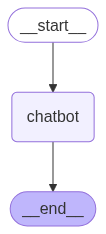

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [12]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        print(event["chatbot"]["messages"])
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User:  why is the sky blue?


[AIMessage(content="The sky appears blue primarily due to a phenomenon called Rayleigh scattering. When sunlight enters Earth's atmosphere, it collides with molecules and small particles in the air. Sunlight consists of different colors, each with its wavelength. Blue light waves are shorter and scatter more than the other colors when they strike the gas molecules in the atmosphere. This scattering causes the blue light to spread in all directions and become more visible, making the sky appear blue to our eyes.\n\nDuring sunrise or sunset, the sky can appear red or orange because the sun is lower in the sky, and its light passes through a thicker layer of the atmosphere. In this case, the shorter blue wavelengths are scattered out of the line of sight, and the longer red wavelengths dominate.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 148, 'prompt_tokens': 13, 'total_tokens': 161, 'completion_tokens_details': {'accepted_prediction_tok

User:  why is the grass green?


[AIMessage(content="The grass appears green primarily due to the presence of chlorophyll, a pigment found in the chloroplasts of plant cells. Chlorophyll is essential for photosynthesis, the process by which plants convert light energy from the sun into chemical energy. Chlorophyll absorbs light most efficiently in the blue and red wavelengths, but it reflects and transmits the green wavelengths, which is why grass looks green to our eyes. Additionally, chlorophyll plays a crucial role in capturing light energy and facilitating the synthesis of carbohydrates, which fuel the plant's growth and metabolic functions.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 13, 'total_tokens': 123, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-0

User:  Summarize what did I asked you during this session.


[AIMessage(content="I'm sorry, but as an AI language model, I don't have the ability to retain or recall information from previous interactions. Each session is independent, and I don't store any personal data or conversation history. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 19, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CANdLaCCXiCkWWp9fX8CoNPERBjzV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4024b916-f550-41f5-a1d8-a1240debe4ea-0', usage_metadata={'input_tokens': 19, 'output_tokens': 47, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_det

User:  q


Goodbye!


In [13]:
graph.invoke('hi')

InvalidUpdateError: Expected dict, got hi
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [14]:
from langchain_core.messages import HumanMessage

graph.invoke({"messages": [HumanMessage(content="Hey, how are you?")]})

{'messages': [HumanMessage(content='Hey, how are you?', additional_kwargs={}, response_metadata={}, id='8f049b8d-63e4-4c55-949f-08e140e010fa'),
  AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_46bff0e0c8', 'id': 'chatcmpl-CAORtKUV6Brs933oHu7Z2yB9O05yk', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b763fa64-ff4f-479a-93ad-5607b653ac0b-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}

## 105. Tool Usage and Persistence
* https://drive.google.com/file/d/113yjenUddxEMnHX6Ud3aqSF5jf7ee4x2/view?usp=drive_link
* https://www.tavily.com/

### tool usage
```sh
pip install tavily-python
```

In [16]:
assert {"TAVILY_API_KEY"} <= set(os.environ)

In [17]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

/var/folders/02/m1j4q6jj79zbjw0qtxcldpnc0000gn/T/ipykernel_5566/3979812345.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=2)


[{'title': 'What is LangGraph? - IBM',
  'url': 'https://www.ibm.com/think/topics/langgraph',
  'content': 'Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
  'score': 0.9263638},
 {'title': "Introduction to LangGraph: A Beginner's Guide - Medium",
  'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Stateful Graph: LangGraph revolves around the concept of a stateful graph, where each node in the graph represents a step in your computation, and the graph maintains a state that is passed around and updated as the computation progresses.\n Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computa

In [18]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o")

# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

In [19]:
## note: can be replaced with pre-built `ToolNode`
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

In [20]:
from typing import Literal


def route_tools(
    state: State,
) -> Literal["tools", "__end__"]:
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return "__end__"


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "__end__" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", "__end__": "__end__"},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

You've hit on a crucial point, and your confusion is completely understandable. For the simple task of calling a single tool, LangGraph absolutely looks like overkill.

You're not missing anything in your observation; you're just seeing the difference between a simple, pre-built tool and a powerful, low-level framework.

Think of it like this:

* **`AgentExecutor` is like buying a pre-built, factory-made car.** It’s easy to use, works great for standard driving, and gets you from point A to B reliably. 🚗
* **`LangGraph` is like being given a high-performance engine, chassis, wheels, and a toolbox.** You have to assemble the car yourself, which is more work. But you can build a Formula 1 racer, a monster truck, or a multi-person vehicle—whatever you can imagine. 🏎️🛠️

The complexity of LangGraph is the price of **ultimate control and flexibility**.

---
#### ## Key Benefits LangGraph Provides (That `AgentExecutor` Doesn't)

The "obvious benefits" you were looking for only appear when your agent's logic needs to be more complex than the simple `Think -> Act -> Observe -> Think` loop that `AgentExecutor` forces you into.

##### **1. Full Control Over the "Loop"**

* **`AgentExecutor` has a fixed, hidden loop.** The agent calls an LLM, the LLM decides to use a tool, the tool is run, and the result is fed back to the LLM. You can't easily change this sequence.
* **`LangGraph` makes you define the loop explicitly using nodes and edges.** This is its superpower. It means you can create any logic you want, such as:
    * **Cycles:** Go back to a previous step if the result isn't good enough.
    * **Human-in-the-Loop:** Add a node that pauses the process and waits for a human to approve the LLM's plan before executing a costly tool.
    * **Multi-Agent Workflows:** Have one "Planner" agent create a task list, and then route tasks to multiple "Worker" agents that can run in parallel.
    * **Conditional Logic:** If a tool fails, route to a "Fallback" node. If the user's query is ambiguous, route to a "Clarification" node that asks the user a question.

##### **2. Explicit State Management**

* **`AgentExecutor` manages state internally** in the `agent_scratchpad`. This works, but it's like a black box.
* **`LangGraph` forces you to define an explicit `State` object** (the `TypedDict` in your code). This seems like extra work, but it's a massive advantage for complex tasks. You have complete control over the agent's "memory." At any node, you can read from, add to, or modify the state with precision.

##### **3. Enhanced Debugging and Visibility**

* Because `AgentExecutor` is a high-level abstraction, it can sometimes be difficult to pinpoint exactly where things went wrong inside its internal loop.
* With `LangGraph`, every step (**node**) and every transition (**edge**) is a piece of code you wrote. This makes it far easier to trace the flow of data and debug complex interactions. When you visualize a LangGraph (especially with LangSmith), you see *your* custom logic, not a generic loop.

---
###### ## When to Use Which

Your Udemy course is likely starting with `AgentExecutor` because it's the fastest way to understand the basics. Then it introduces `LangGraph` for more advanced, real-world applications.

* **Use `AgentExecutor` for:**
    * **Prototyping:** Quickly building standard agents that follow the simple `(LLM -> Tool)` pattern.
    * **Simple Tool Use:** When all you need is for an LLM to reliably call one or more tools and return a final answer.

* **Use `LangGraph` for:**
    * **Complex Control Flow:** Anything that isn't a straight line (e.g., requires cycles, branching, or retries).
    * **Human-in-the-Loop:** When a person needs to be part of the decision-making process.
    * **Multi-Agent Systems:** When you need to orchestrate collaboration between multiple different chains or agents.
    * **Production Applications:** When you need the reliability, state control, and debuggability required for a robust, long-running agent.

So, for your example, `AgentExecutor` is simpler and better. But if you wanted to ask, "How many letters are in the word 'data', and if the answer is less than 5, search for a new word and try again," you would immediately need the cyclic power of **LangGraph**.

### adding memory

```sh
pip install langgraph-checkpoint-sqlite
```

In [24]:
from langgraph.checkpoint.sqlite import SqliteSaver

memory = SqliteSaver.from_conn_string(":memory:")

In [25]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

In [26]:
graph = graph_builder.compile(checkpointer=memory)

In [27]:
config = {"configurable": {"thread_id": "1"}}

In [29]:
user_input = "Hi there! My name is Alex Leontiev!"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    print(event)
    event["messages"][-1].pretty_print()

AttributeError: '_GeneratorContextManager' object has no attribute 'get_next_version'

In [31]:
graph.invoke(
    # {'messages':[('human','How are you?')]}
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

AttributeError: '_GeneratorContextManager' object has no attribute 'get_next_version'

In [34]:
# from langgraph_sqlite import SqliteSaver
from langgraph.checkpoint.sqlite import SqliteSaver

# memory = SqliteSaver.from_conn_string(":memory:")

# Use a 'with' statement to properly manage the memory connection
with SqliteSaver.from_conn_string(":memory:") as memory:
    # 1. Compile the graph with the checkpointer INSIDE the 'with' block
    graph = graph_builder.compile(checkpointer=memory)

    # 2. Define a configuration for a specific conversation thread
    config = {"configurable": {"thread_id": "1"}}

    # 3. Interact with the graph INSIDE the 'with' block
    print("--- First interaction ---")
    user_input = "Hi there! My name is Alex Leontiev!"
    response = graph.invoke({"messages": [("user", user_input)]}, config)
    # Pretty-print the final response
    response["messages"][-1].pretty_print()

    print("\n--- Second interaction (testing memory) ---")
    user_input_2 = "What did I say my name was?"
    response_2 = graph.invoke({"messages": [("user", user_input_2)]}, config)
    response_2["messages"][-1].pretty_print()

--- First interaction ---
================================== Ai Message ==================================

Hello Alex Leontiev! How can I assist you today?

--- Second interaction (testing memory) ---
================================== Ai Message ==================================

You mentioned that your name is Alex Leontiev.


## 106. Human in the loop
* https://colab.research.google.com/drive/113yjenUddxEMnHX6Ud3aqSF5jf7ee4x2#scrollTo=dba1b168-f8e0-496d-9bd6-37198fb4776e

In [15]:
from typing import Annotated

# from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

memory = SqliteSaver.from_conn_string(":memory:")


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
# llm = ChatAnthropic(model="claude-3-haiku-20240307")
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

In [23]:
# from langgraph_sqlite import SqliteSaver
from langgraph.checkpoint.sqlite import SqliteSaver

# memory = SqliteSaver.from_conn_string(":memory:")

# Use a 'with' statement to properly manage the memory connection
with SqliteSaver.from_conn_string(":memory:") as memory:
    # 1. Compile the graph with the checkpointer INSIDE the 'with' block
    graph = graph_builder.compile(
        checkpointer=memory,
        # This is new!
        interrupt_before=["tools"],
    )

    # 2. Define a configuration for a specific conversation thread
    config = {"configurable": {"thread_id": "1"}}

    # 3. Interact with the graph INSIDE the 'with' block
    messages = [
        """I'm learning LangGraph. Could you do some research on it for me?"""
        # "Hi there! My name is Alex Leontiev!",
        # "What did I say my name was?",
    ]
    for i, user_input in enumerate(messages):
        print(f"--- interaction #{i+1} ---")
        # user_input =
        response = graph.invoke({"messages": [("user", user_input)]}, config)
        # Pretty-print the final response
        response["messages"][-1].pretty_print()

    # print("\n--- Second interaction (testing memory) ---")
    # user_input_2 =
    # response_2 = graph.invoke({"messages": [("user", user_input_2)]}, config)
    # response_2["messages"][-1].pretty_print()

    snapshot = graph.get_state(config)
    print(snapshot.next)

    existing_message = snapshot.values["messages"][-1]
    print(existing_message.tool_calls)

    ## allow continuation

--- interaction #1 ---
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_ELU44JJPnQB2Cxz0eh8LnCs8)
 Call ID: call_ELU44JJPnQB2Cxz0eh8LnCs8
  Args:
    query: LangGraph programming language
('tools',)
[{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph programming language'}, 'id': 'call_ELU44JJPnQB2Cxz0eh8LnCs8', 'type': 'tool_call'}]


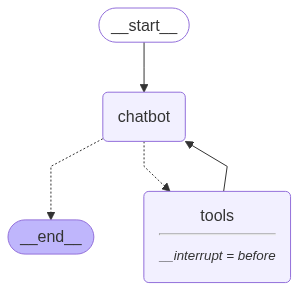

In [24]:
graph

In [25]:
# from langgraph_sqlite import SqliteSaver
from langgraph.checkpoint.sqlite import SqliteSaver

# memory = SqliteSaver.from_conn_string(":memory:")

# Use a 'with' statement to properly manage the memory connection
with SqliteSaver.from_conn_string(":memory:") as memory:
    # 1. Compile the graph with the checkpointer INSIDE the 'with' block
    graph = graph_builder.compile(
        checkpointer=memory,
        # This is new!
        interrupt_before=["tools"],
    )

    # 2. Define a configuration for a specific conversation thread
    config = {"configurable": {"thread_id": "1"}}

    # 3. Interact with the graph INSIDE the 'with' block
    messages = [
        """I'm learning LangGraph. Could you do some research on it for me?"""
        # "Hi there! My name is Alex Leontiev!",
        # "What did I say my name was?",
    ]
    for i, user_input in enumerate(messages):
        print(f"--- interaction #{i+1} ---")
        # user_input =
        response = graph.invoke({"messages": [("user", user_input)]}, config)
        # Pretty-print the final response
        response["messages"][-1].pretty_print()

    # print("\n--- Second interaction (testing memory) ---")
    # user_input_2 =
    # response_2 = graph.invoke({"messages": [("user", user_input_2)]}, config)
    # response_2["messages"][-1].pretty_print()

    snapshot = graph.get_state(config)
    print(snapshot.next)

    existing_message = snapshot.values["messages"][-1]
    print(existing_message.tool_calls)

    ## allow continuation
    events = graph.stream(None, config, stream_mode="values")
    for event in events:
        if "messages" in event:
            event["messages"][-1].pretty_print()

--- interaction #1 ---
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_Mh2p2ixAanSRk9doJn5U9K7C)
 Call ID: call_Mh2p2ixAanSRk9doJn5U9K7C
  Args:
    query: LangGraph programming language
('tools',)
[{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph programming language'}, 'id': 'call_Mh2p2ixAanSRk9doJn5U9K7C', 'type': 'tool_call'}]
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_Mh2p2ixAanSRk9doJn5U9K7C)
 Call ID: call_Mh2p2ixAanSRk9doJn5U9K7C
  Args:
    query: LangGraph programming language
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "LangGraph: A Framework for Building Stateful Multi-Agent ...", "url": "https://medium.com/@ken_lin/langgraph-a-framework-for-building-stateful-multi-agent-llm-applications-a51d5eb68d03", "content":